# Prediction Model for Hospital Excess Readmission Ratio
# Reuben Martor
# DSC 680 Project 3 milestone 3

In [123]:
# Re-import necessary libraries and load the dataset and model details again after kernel reset

import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

In [124]:
# Load the dataset provided by the user

df = pd.read_csv('FY_2024_Hosp_Readm.csv')
print('Stattistics: \n',df['Facility ID'].describe())


Stattistics: 
 count     18774.000000
mean     261506.077661
std      163743.437584
min       10001.000000
25%      110086.000000
50%      250049.000000
75%      390113.000000
max      670319.000000
Name: Facility ID, dtype: float64


In [125]:
# statistics on facilities 
# df.drop(columns='Footnote', inplace=True)
fac_opr_by_total = df.groupby(['State','Facility ID']).sum('Facility ID')
fac_opr_by_mean = df.groupby(['State','Facility ID']).mean('Facility ID')

print(f'Mean facility operations :\n {fac_opr_by_mean}')
state_opr_mean = fac_opr_by_mean.groupby('State').mean()
state_opr_total = fac_opr_by_total.groupby('State').sum()
print('\n Mean state operation by State:')
state_opr_mean



Mean facility operations :
                    Number of Discharges  Footnote  Excess Readmission Ratio  \
State Facility ID                                                             
AK    20001                      257.75       NaN                  0.956467   
      20006                      141.00       5.0                  1.047420   
      20008                         NaN       3.0                  1.009500   
      20012                         NaN       5.0                  0.949560   
      20017                      194.60       NaN                  0.994067   
...                                 ...       ...                       ...   
WY    530014                     254.50       1.0                  0.993020   
      530015                        NaN       3.0                  1.015575   
      530025                        NaN       2.0                  0.997400   
      530032                        NaN       3.0                  0.978950   
      530034            

,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate
State,,,,,
AK,160.070000,4.000000,0.987945,13.747962,13.997279
AL,159.633951,3.274317,1.002358,15.010679,15.005761
AR,230.341892,3.380952,1.005605,14.567465,14.388598
AZ,226.278395,3.188889,0.997138,13.636183,13.717891
CA,169.381749,2.690895,1.009449,16.105742,15.905872
CO,151.703535,2.881579,0.967965,12.399749,12.755355
CT,242.251282,3.396825,1.010325,15.140894,14.972256
DC,218.697222,3.833333,1.041356,17.771910,17.112643
DE,362.322222,4.333333,0.962108,14.115709,14.662349


In [126]:

# Determine the unique count of 'Facility ID'
unique_facility_id_count = df['Facility ID'].nunique()
unique_facility_name_count = df['Facility Name'].nunique()

f'Unique facility count:  {unique_facility_id_count :,}' # 3,129
f'Unique facility name count:  {unique_facility_name_count :,}' # 3,058
df['State'].nunique() # 51 states
df.drop(columns='Footnote', inplace=True) # footnote column dropped 

In [127]:

df['Start Date'].value_counts(), df['End Date'].value_counts()
df['Measure Name'].value_counts()

Measure Name
READM-30-HIP-KNEE-HRRP    3129
READM-30-HF-HRRP          3129
READM-30-AMI-HRRP         3129
READM-30-PN-HRRP          3129
READM-30-CABG-HRRP        3129
READM-30-COPD-HRRP        3129
Name: count, dtype: int64

In [128]:
df.head()  

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,NaN,0.8916,3.5325,3.9618,Too Few to Report,07/01/2019,06/30/2022
1,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,616.0,1.1003,23.1263,21.0184,149,07/01/2019,06/30/2022
2,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,274.0,0.9332,12.9044,13.8283,32,07/01/2019,06/30/2022
3,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,404.0,0.9871,17.0529,17.2762,68,07/01/2019,06/30/2022
4,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,126.0,0.9517,9.8131,10.3112,11,07/01/2019,06/30/2022


#### The Excess Readmission Ratio (ERR) is a key metric used in the dataset to measure hospital readmissions. It compares a hospital’s actual readmission rate to the expected readmission rate based on the national average for hospitals treating similar patients.

Formula for Excess Readmission Ratio (ERR):


\text{Excess Readmission Ratio (ERR)} = \frac{\text{Predicted Readmission Rate}}{\text{Expected Readmission Rate}}


Here’s how each part contributes to the calculation:

	•	Predicted Readmission Rate: This is the rate at which patients at a specific hospital are expected to be readmitted based on their characteristics (e.g., severity of illness, age). It’s a hospital-specific prediction.
	•	Expected Readmission Rate: This is the rate at which patients are expected to be readmitted across all hospitals treating similar patients. It serves as a benchmark, representing the national standard for comparable cases.

The Excess Readmission Ratio is calculated by dividing the hospital’s predicted readmission rate by the expected rate.

	•	ERR < 1: This means the hospital has fewer readmissions than expected (better performance).
	•	ERR > 1: This indicates more readmissions than expected (poorer performance).

In the dataset, the readmission average for a state or facility is computed as the mean of the “Excess Readmission Ratio” values across all facilities or conditions being evaluated in that particular group (e.g., state or hospital).

This average tells us how the hospital or state is performing relative to the national benchmark for readmissions.

In [129]:
# information regarding the number of facilities by state
# Information regarding the number of facilities by state
facility_counts = df.groupby('State')['Facility ID'].count().reset_index()
facility_counts = facility_counts.rename(columns={'Facility ID': 'Facility Count'})
facility_counts = facility_counts.sort_values(by='Facility Count', ascending=True)

# Display the result
print(facility_counts)

   State  Facility Count
46    VT              36
8     DE              36
7     DC              36
28    ND              42
0     AK              48
39    RI              60
50    WY              60
26    MT              72
11    HI              72
30    NH              78
13    ID              96
41    SD             102
21    ME             102
33    NV             138
29    NE             144
49    WV             150
6     CT             174
32    NM             180
12    IA             186
37    OR             198
44    UT             198
20    MD             264
2     AR             276
23    MN             276
47    WA             282
16    KS             288
5     CO             300
40    SC             306
19    MA             330
25    MS             372
17    KY             372
3     AZ             384
31    NJ             384
24    MO             396
48    WI             402
45    VA             426
36    OK             468
42    TN             480
1     AL             486


In [130]:
# total facilities 
total_fac = facility_counts['Facility Count'].sum()
print(f"TOTAL FACILITIES : {total_fac:,}")

TOTAL FACILITIES : 18,774


In [131]:
# Question 1: Which states have the highest and lowest average readmission rates across all conditions?

# Group by state and calculate the average of 'Excess Readmission Ratio'
state_readmission_avg = df.groupby('State')['Excess Readmission Ratio'].mean().sort_values()
print('Readmission Avg by',state_readmission_avg)
# Get the states with the highest and lowest average readmission rates
lowest_avg_state = state_readmission_avg.idxmin(), state_readmission_avg.min()
highest_avg_state = state_readmission_avg.idxmax(), state_readmission_avg.max()


state_readmission_avg_df = pd.DataFrame(state_readmission_avg, columns=['State', 'Readmission_average'])
state_readmission_avg_df = pd.to_numeric(state_readmission_avg_df['Readmission_average'])


Readmission Avg by State
ID    0.942316
SD    0.945733
ND    0.955572
MT    0.956404
UT    0.958829
ME    0.959558
DE    0.960684
NE    0.963359
IA    0.964396
OR    0.967148
KS    0.967845
CO    0.971432
WY    0.971728
WA    0.975954
WI    0.977176
MN    0.981883
HI    0.987283
AK    0.987527
MD    0.988090
IN    0.993236
AZ    0.995612
OK    0.995621
NM    0.996219
VA    0.996417
OH    1.000000
MO    1.000552
SC    1.001267
MI    1.001777
TX    1.002338
TN    1.003312
PA    1.003654
NC    1.004920
LA    1.004969
RI    1.006103
AL    1.006628
VT    1.007154
GA    1.007689
AR    1.008103
NH    1.008746
CT    1.010242
KY    1.010659
CA    1.010706
NY    1.013091
MS    1.016125
FL    1.016425
IL    1.019493
WV    1.022060
NV    1.023144
NJ    1.026657
DC    1.038325
MA    1.042283
Name: Excess Readmission Ratio, dtype: float64


### Question 1: Which states have the highest and lowest average readmission rates across all conditions?
### Based on the results above, Idaho has the lowest readmission rate of 0.94 while Massachusets has the highest readmission rate of 1.04.


## VISUALIZATIONS



Readmission Avg by State: State
ID    0.942316
SD    0.945733
ND    0.955572
MT    0.956404
UT    0.958829
ME    0.959558
DE    0.960684
NE    0.963359
IA    0.964396
OR    0.967148
KS    0.967845
CO    0.971432
WY    0.971728
WA    0.975954
WI    0.977176
MN    0.981883
HI    0.987283
AK    0.987527
MD    0.988090
IN    0.993236
AZ    0.995612
OK    0.995621
NM    0.996219
VA    0.996417
OH    1.000000
MO    1.000552
SC    1.001267
MI    1.001777
TX    1.002338
TN    1.003312
PA    1.003654
NC    1.004920
LA    1.004969
RI    1.006103
AL    1.006628
VT    1.007154
GA    1.007689
AR    1.008103
NH    1.008746
CT    1.010242
KY    1.010659
CA    1.010706
NY    1.013091
MS    1.016125
FL    1.016425
IL    1.019493
WV    1.022060
NV    1.023144
NJ    1.026657
DC    1.038325
MA    1.042283
Name: Excess Readmission Ratio, dtype: float64


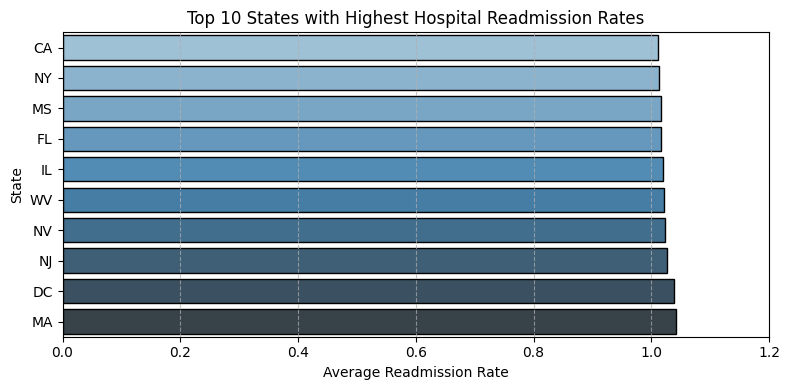

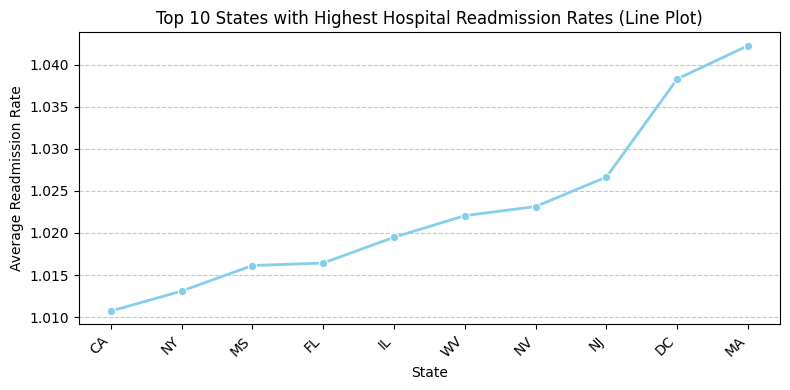

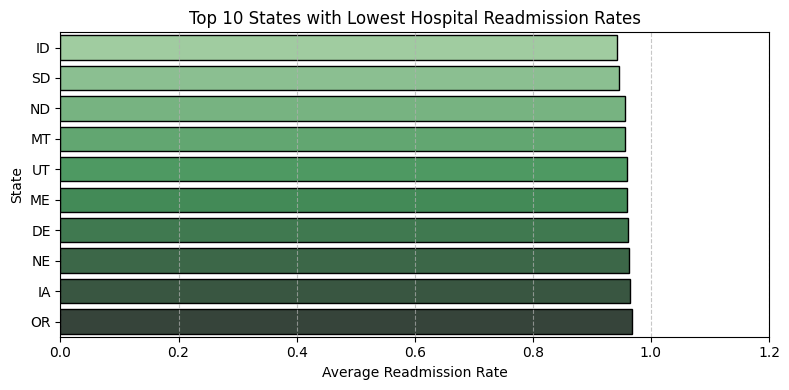

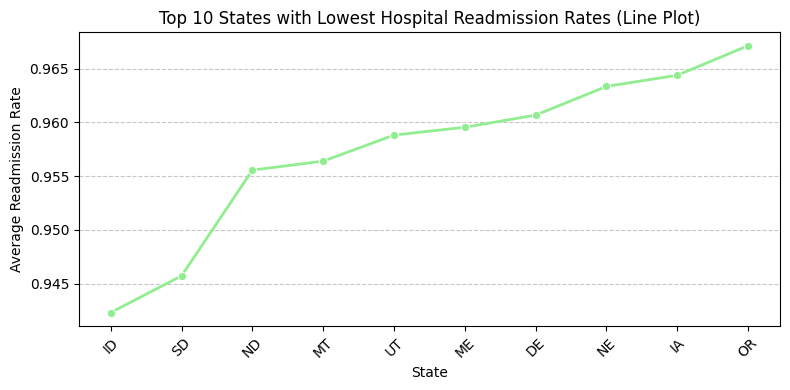

In [132]:
# Group by state and calculate the average of 'Excess Readmission Ratio'
state_readmission_avg = df.groupby('State')['Excess Readmission Ratio'].mean().sort_values()

# Obtain the top 10 states with the highest and lowest average readmission rates
top_10_states = state_readmission_avg.tail(10)  # Highest averages
low_10_states = state_readmission_avg.head(10)  # Lowest averages

# Group by state and calculate the average of 'Excess Readmission Ratio'
state_readmission_avg = df.groupby('State')['Excess Readmission Ratio'].mean().sort_values()
print('Readmission Avg by State:', state_readmission_avg)

# Get the top 10 states with the highest and lowest average readmission rates
top_10_states = state_readmission_avg.tail(10)  # Highest averages
low_10_states = state_readmission_avg.head(10)  # Lowest averages

# Convert the Series to DataFrames for easier plotting with Seaborn
top_10_states_df = top_10_states.reset_index()
top_10_states_df.columns = ['State', 'Readmission Average']

low_10_states_df = low_10_states.reset_index()
low_10_states_df.columns = ['State', 'Readmission Average']

# Plot for Top 10 States with Highest Readmission Rates (Bar Plot)
plt.figure(figsize=(8, 4))
sns.barplot(x='Readmission Average', y='State', data=top_10_states_df, palette='Blues_d', edgecolor='black')
plt.xlabel('Average Readmission Rate')
plt.ylabel('State')
plt.title('Top 10 States with Highest Hospital Readmission Rates')
plt.xlim(0, 1.2)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot for Top 10 States with Highest Readmission Rates (Line Plot)
plt.figure(figsize=(8, 4))
sns.lineplot(x='State', y='Readmission Average', data=top_10_states_df, marker='o', color='skyblue', linewidth=2)
plt.xlabel('State')
plt.ylabel('Average Readmission Rate')
plt.title('Top 10 States with Highest Hospital Readmission Rates (Line Plot)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot for Top 10 States with Lowest Readmission Rates (Bar Plot)
plt.figure(figsize=(8, 4))
sns.barplot(x='Readmission Average', y='State', data=low_10_states_df, palette='Greens_d', edgecolor='black')
plt.xlabel('Average Readmission Rate')
plt.ylabel('State')
plt.title('Top 10 States with Lowest Hospital Readmission Rates')
plt.xlim(0, 1.2)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot for Top 10 States with Lowest Readmission Rates (Line Plot)
plt.figure(figsize=(8, 4))
sns.lineplot(x='State', y='Readmission Average', data=low_10_states_df, marker='o', color='lightgreen', linewidth=2)
plt.xlabel('State')
plt.ylabel('Average Readmission Rate')
plt.title('Top 10 States with Lowest Hospital Readmission Rates (Line Plot)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Curious to obtain Statistics on Iowa since I live there.

In [133]:

Iowa_stats = df.query("State =='IA'")
Iowa_stats_by_facilty = Iowa_stats.groupby('Facility Name').sum()[['Number of Discharges','Excess Readmission Ratio','Predicted Readmission Rate']].sort_values('Excess Readmission Ratio', ascending=False)
Iowa_stats_by_facilty = Iowa_stats_by_facilty.sort_values(by='Number of Discharges', ascending=False)
Iowa_stats_by_facilty

,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate
Facility Name,,,
UNITYPOINT HEALTH - DES MOINES IOWA METHODIST MEDI,4003.0,5.6239,71.0276
MERCYONE DES MOINES MEDICAL CENTER,2549.0,5.5190,74.3562
GENESIS MEDICAL CENTER-DAVENPORT,1627.0,5.7852,80.2862
MERCYONE NORTH IOWA MEDICAL CENTER,1626.0,6.0961,83.9477
ST LUKES HOSPITAL,1372.0,5.8589,78.4343
MERCY MEDICAL CENTER - CEDAR RAPIDS,1138.0,5.8806,76.8133
MERCY HOSPITAL,1128.0,4.9192,67.4923
UNIVERSITY OF IOWA HOSPITAL & CLINICS,1053.0,5.8419,88.8081
SOUTHEAST IOWA REGIONAL MEDICAL CENTER,968.0,4.7446,66.7577


In [134]:
# The state with the highest average readmission rate is Massachusetts (MA) with an average of 1.042.

state = highest_avg_state[0]
high_avg_rate =highest_avg_state[1]
print(f'State with the Highest Average Readmission rate {state} ----  {high_avg_rate:.3f}')

# Question 1, the state with the lowest average readmission rate is Idaho (ID) with an average “Excess Readmission Ratio” of 0.942,
state = lowest_avg_state[0]
low_avg_rate =lowest_avg_state[1]

print(f'State with the Lowest Average Readmission       {state} ----  {low_avg_rate:.3f}')

State with the Highest Average Readmission rate MA ----  1.042
State with the Lowest Average Readmission       ID ----  0.942


### Predictive model using Linear Regression to predict the “Excess Readmission Ratio” based on the number of discharges, predicted and expected readmission rates 


In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecting the relevant features for the predictive model
features = ['Number of Discharges', 'Predicted Readmission Rate', 'Expected Readmission Rate']
target = 'Excess Readmission Ratio'



#### Exploratory data analysis 
##### Distribution of dataset

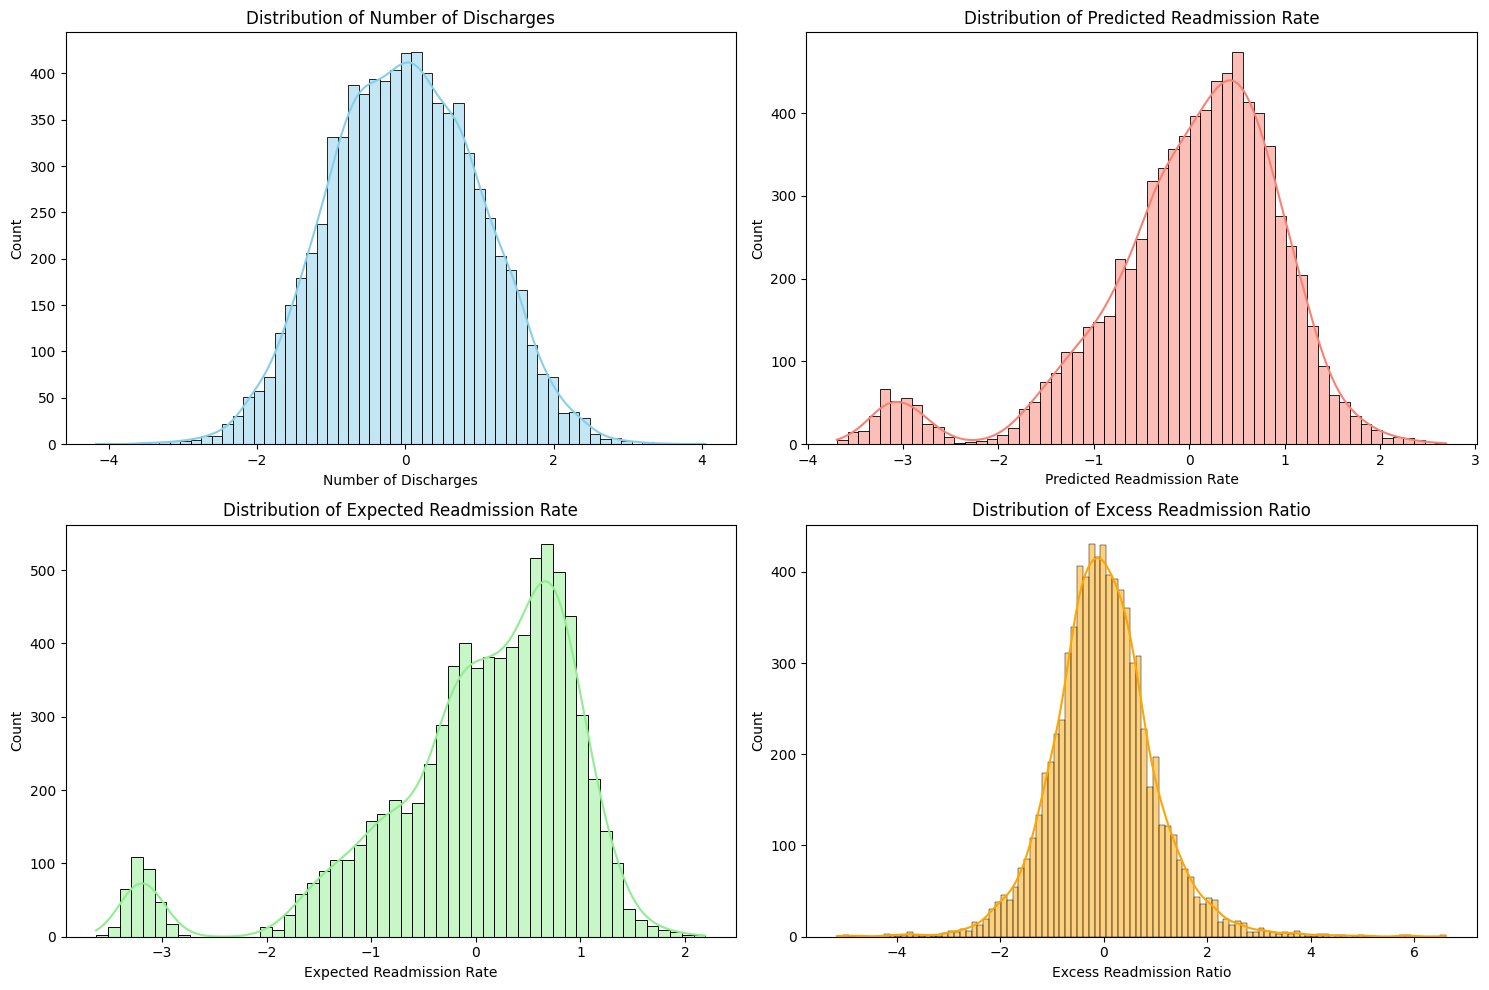

In [136]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting distributions for the selected features and target
plt.figure(figsize=(15, 10))

# Distribution for 'Number of Discharges'
plt.subplot(2, 2, 1)
sns.histplot(cleaned_dataset['Number of Discharges'], kde=True, color='skyblue')
plt.title('Distribution of Number of Discharges')

# Distribution for 'Predicted Readmission Rate'
plt.subplot(2, 2, 2)
sns.histplot(cleaned_dataset['Predicted Readmission Rate'], kde=True, color='salmon')
plt.title('Distribution of Predicted Readmission Rate')

# Distribution for 'Expected Readmission Rate'
plt.subplot(2, 2, 3)
sns.histplot(cleaned_dataset['Expected Readmission Rate'], kde=True, color='lightgreen')
plt.title('Distribution of Expected Readmission Rate')

# Distribution for 'Excess Readmission Ratio' (target)
plt.subplot(2, 2, 4)
sns.histplot(cleaned_dataset['Excess Readmission Ratio'], kde=True, color='orange')
plt.title('Distribution of Excess Readmission Ratio')

plt.tight_layout()
plt.show()

In [137]:
# Dropping rows with missing values to ensure clean data for modeling
cleaned_dataset = df.dropna(subset=features + [target])
cleaned_dataset

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,616.0,1.1003,23.1263,21.0184,149,07/01/2019,06/30/2022
2,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,274.0,0.9332,12.9044,13.8283,32,07/01/2019,06/30/2022
3,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,404.0,0.9871,17.0529,17.2762,68,07/01/2019,06/30/2022
4,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,126.0,0.9517,9.8131,10.3112,11,07/01/2019,06/30/2022
5,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-COPD-HRRP,117.0,0.9803,18.1837,18.5483,20,07/01/2019,06/30/2022
...,...,...,...,...,...,...,...,...,...,...,...
18642,HOUSTON METHODIST THE WOODLANDS HOSPITAL,670122,TX,READM-30-PN-HRRP,362.0,0.9546,17.1867,18.0047,59,07/01/2019,06/30/2022
18644,HOUSTON METHODIST THE WOODLANDS HOSPITAL,670122,TX,READM-30-HF-HRRP,432.0,1.0423,22.4903,21.5771,100,07/01/2019,06/30/2022
18645,HOUSTON METHODIST THE WOODLANDS HOSPITAL,670122,TX,READM-30-COPD-HRRP,102.0,0.9940,20.0020,20.1237,20,07/01/2019,06/30/2022
18646,HOUSTON METHODIST THE WOODLANDS HOSPITAL,670122,TX,READM-30-CABG-HRRP,67.0,1.1302,11.3768,10.0660,11,07/01/2019,06/30/2022


In [144]:
# Defining X (features) and y (target)
X = cleaned_dataset[features]
y = cleaned_dataset[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)
# Evaluating the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



In [145]:
# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Analysis of results
print("\nAnalysis:")
if r2 > 0.7:
    print("The model explains a good amount of variance in the target variable.")
elif 0.4 < r2 <= 0.7:
    print("The model explains a moderate amount of variance in the target variable.")
else:
    print("The model may be underfitting; consider using a more complex model or additional features.")




Mean Absolute Error (MAE): 0.0128
Mean Squared Error (MSE): 0.0007
Root Mean Squared Error (RMSE): 0.0273
R-squared (R2): 0.8633

Analysis:
The model explains a good amount of variance in the target variable.


In [139]:
# The coefficients of the linear regression model to understand the influence of each feature
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})

# Display the coefficients to understand the importance of each feature in predicting the target
coefficients

,Feature,Coefficient
0,Number of Discharges,-0.000020
1,Predicted Readmission Rate,0.059890
2,Expected Readmission Rate,-0.061201


In [140]:
# The model’s performance, evaluated using Mean Squared Error (MSE), is 0.000745, indicating a relatively low error in prediction.

#### The coefficients in a linear regression model represent the relationship between the independent variables (features) and the dependent variable (target). Specifically, they quantify the change in the target variable for a one-unit change in each feature, while holding other features constant.

In the context of our model, which is predicting the Excess Readmission Ratio based on the number of discharges, predicted readmission rate, and expected readmission rate, here’s what each coefficient means:

	1.	Number of Discharges: Coefficient = -0.00002
	This coefficient is very small and negative, indicating that as the number of discharges increases by 1, the Excess Readmission Ratio decreases slightly (by 0.00002 units). In other words, more discharges are weakly associated with a slightly lower readmission ratio.
	2.	Predicted Readmission Rate: Coefficient = 0.05989
	This positive coefficient means that for every 1-unit increase in the Predicted Readmission Rate, the Excess Readmission Ratio increases by 0.05989 units. This suggests that hospitals with higher predicted readmission rates are more likely to have higher excess readmissions.
	3.	Expected Readmission Rate: Coefficient = -0.06120
	This negative coefficient shows that for every 1-unit increase in the Expected Readmission Rate, the Excess Readmission Ratio decreases by 0.06120 units. This indicates that hospitals with higher expected readmission rates tend to have lower excess readmissions, possibly because they are compared to higher benchmarks (national standards).

Interpreting the Coefficients Together:

	Magnitude and direction: The larger the coefficient, the stronger the effect of that feature on the target variable. In this case, the Predicted Readmission Rate has the strongest positive effect, while the Expected Readmission Rate has the strongest negative effect. The Number of Discharges has a minimal impact.

In [146]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Combine the performance metrics
model_performance = {
    'Mean Squared Error (MSE)': mse,
    'Mean Absolute Error (MAE)': mae,
    'R-squared (R2) Score': r2
}

model_performance

{'Mean Squared Error (MSE)': 0.0007450226974944381,
 'Mean Absolute Error (MAE)': 0.01276460058298582,
 'R-squared (R2) Score': 0.8633048958185412}

Goodness of Fit: An R² score close to 1 suggests a strong relationship between the dependent and independent variables, meaning the model fits the data well. An R² of 0.8633 indicates a good fit.
	2.	Unexplained Variance: The remaining 13.67% of the variance is not explained by the model. This could be due to other factors not included in the model or inherent variability in the data.
	3.	Model Validation: While a high R² score can indicate a good model, it’s important to consider other metrics (like adjusted R², root mean squared error, etc.) and validation techniques to ensure that the model is robust and not overfitting.
	4.	Contextual Interpretation: The importance of the R² score can vary by field. In some contexts, an R² of 0.8633 is excellent, while in others, it might be considered acceptable but not ideal.

In summary, an R² score of 0.8633 suggests that the regression model is effective at explaining the variability in the data, but it is also important to analyze other aspects of the model to assess its overall performance fully.

In [148]:
#  actual vs. predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

# Display the first 10 rows to compare actual and predicted values
print(comparison_df.head(10))

   Actual  Predicted
0  0.9319   0.897738
1  0.9653   0.963500
2  1.0828   1.087061
3  1.0290   1.032749
4  1.1454   1.119759
5  0.9465   0.942064
6  0.8986   0.930392
7  1.0583   1.065363
8  1.0337   1.034776
9  0.9922   1.000795


### Using a margin of error of 10%, I will classify a prediction as accurate if error falls below the margin of error

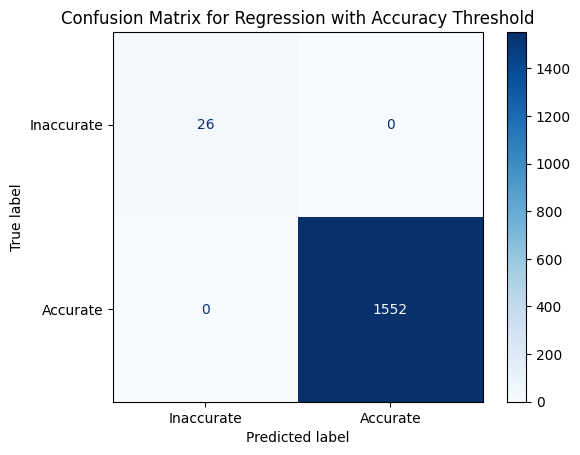

In [151]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 10% margin threshold for "accurate" predictions
margin = 0.1
# Classify each prediction as accurate (1) or inaccurate (0)
y_test_class = (np.abs(y_pred - y_test.values) <= margin * y_test.values).astype(int)
y_pred_class = (np.abs(y_pred - y_test.values) <= margin * y_test.values).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Inaccurate", "Accurate"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Regression with Accuracy Threshold")
plt.show()

The regression model’s performance with a ±10% accuracy threshold is analyzed below:

The confusion matrix shows the following counts:

	True Positives (Accurate predictions within ±10%): 1552
	False Negatives (Inaccurate predictions that were classified as accurate): 0
	False Positives (Accurate predictions classified as inaccurate): 0
	True Negatives (Inaccurate predictions outside ±10%): 26

Analysis

	High Accuracy:
	The majority of predictions (1552 out of the total 1578) are within the ±10% threshold, meaning they are accurate within this margin. This suggests that the model is highly effective at predicting values close to the actual ones within the defined margin of error.
	No Misclassifications:
	There are no false positives or false negatives, indicating that the model’s classification of predictions as either accurate or inaccurate is highly reliable within the ±10% margin.
	Small Number of Inaccurate Predictions:
	Only 26 predictions fall outside the ±10% margin, which is a very low number compared to the total predictions. This low count of inaccuracies suggests that the model is well-fitted to the data and has minimal large errors.
	Potential Overfitting: 
    While the model’s accuracy is impressive, the absence of any false positives or false negatives might indicate potential overfitting. This could mean the model has learned the data too well, and its performance on new data may not be as high as observed here. However, this is only a possibility and would need further testing on unseen data.

Recommendations

	Evaluate on New Data:
	To confirm that the model generalizes well, test it on an unseen dataset to ensure that this high accuracy is not limited to the current dataset.
	Further Analysis of Inaccurate Predictions:
	Investigate the 26 inaccurate predictions to determine if there are specific patterns or data characteristics (e.g., outliers or certain feature values) that contribute to these errors. This may reveal additional insights for model improvement.
	Consider Additional Models:
	Although the model performed well, trying other regression models (e.g. ensemble methods like Random Forest or Gradient Boosting) could yield insights into whether simpler models or more complex techniques improve performance.

Conclusion

Overall, the model shows excellent predictive performance within a ±10% margin, with most predictions being classified as accurate. The results indicate a strong model fit, though further testing on new data would be ideal to ensure this performance is generalizable.
This model appears to be reliable for the given data and can be used confidently, provided additional testing confirms its robustness on unseen data.